<h>Resumo </h>

Este artigo busca responder os efeitos da aplicação de algorítimos de compressão de imagens comumente utilizados quando aplicados a imagens Dicom, bem como encontrar um método de compressão de imagens de tomografia computadorizada, tendo em vista que a perda de qualidade seja minimizada ao ponto de não interferir em uma análise clínica humana.<br>
**Palavras Chave:** DICOM; Imagens; Compressão; Método;

# Introdução

Durante a década de 80, pesquisas no sentido de se criar um padrão para comunicação e armazenamento de imagens digitais médicas foram empreendidas pelo <i>American College of Radiology</i> em conjunto com o <i>National Electrical Manufacturers Association</i>. Tais pesquisas resultaram em 1993 na criação do padrão <i>digital imaging and communications in medicine.</i> <cite data-cite="grauer2009working"></cite> <br>


Ainda de acordo com os autores, um registro DICOM consiste em um conjunto de informações sobre o paciente e as condições específicas da imagem adquirida deste (chamados de DICOMDIR) adicionado de um conjunto de várias imagens 2D (lâminas) que ordenadas de maneira adequada formam uma imagem 3D.<br>

Os registros DICOM são arquivos eletrônicos de dados relativamente grandes e por isso consomem muito recurso, tanto em capacidade para o seu devido armazenamento quanto em banda para sua transmissão em redes de dados, gerando altos custos e complicações de infraestrutura de TI. Os autores destacam que, apesar dos problemas aludidos, a demanda por armazenamento deste tipo de dados tem crescido bastante o que eleva o interesse pela busca por alternativas eficientes para a compressão destes dados. <br>

Ainda conforme a visão dos autores, esta necessidade se evidencia em departamentos de imagens médicas, principalmente quando se fala em imagens de multiplas lâminas, como nos casos de exames de tomografia computadorizada (CT) e de imagem de ressonância magnética (RMI).

O objetivo desta pesquisa é encontrar um método de compressão de imagens para ser aplicado em lâminas de images DICOM relativas a resultados de exames de diagnósticos por imagem, desde que a perda de qualidade seja mínima, não interferindo negativamente em uma análise clínica humana.

Para tal, foi analisado visualmente as imagens, fazendo um corte em uma determinada região da mesma, destacando e aplicando aumento no tamanho para facilitar a comparação. Foi medido também atráves dos algorítimos de erro quadratico médio de índice de similaridade estrutural aplicados à imagem, alterações visuais que ocorrem nos processos de compressão da imagem.

Analisaremos o resultado obtido com a compressão de imagens JPEG por ser um padrão popular e eficiente.

Para auxiliar na pesquisa, utilizaremos os algorítimos do erro quadrático médio (MSE - Mean Square Error) e do índice de similaridade estrutural (SSIM - Structural Similarity Index Measure).<cite data-cite="arthur2017making">

# Motivação

Os exames de diagnósticos por imagem são cada vez mais presentes e frequentes no cotidiano de quem trabalha na área de saúde e sua importância tem crescido continuamente para auxiliar no tratamento de inúmeras patologias.

Os arquivos que armazenam essas imagens geralmente são constituídos em formato puro (<i>raw</i>), sem compressão, com o objetivo da manutenção da fidelidade da imagem captada. Embora os arquivos nesse formato sejam fiéis para a manutenção da imagem idêntica ao que fora originalmente captada, eles mantém toda a informação da captura e por isso são muito mais volumosos demandando muito mais recursos de TI, tanto de espaço para armazenamento em mídias digitais quanto de banda para transmissão em redes, quando comparado com os formatos comprimidos.

Cada vez mais observa-se a necessidade de armazenamento, processamento e transmissão de imagens digitais em hospitais e clínicas médicas e a quantidade destas imagens tem crescido exponencialmente.

Consequentemente o volume de dados que trafegam em redes (locais ou mesmo na internet) e são armazenados nas mais diversas mídias digitais, também tem se tornado cada vez maior e isso tem criado cada vez mais demandas por altas capacidades em infraestrutura de TI. O armazenamento e transmissão de grandes volumes de dados sempre é problemático, e isso significa que a gestão destas imagens acaba sendo onerosa.

Vale ressaltar que a análise destas imagens por algoritimos matemáticos (por exemplo, <i>machine learning</i> e <i>deep learning</i>) é uma tendência que se verifica, sendo que esses algorítimos, quando aplicados, podem realizar reiterados acessos a esses arquivos, o que também se traduz em alta demanda de recursos de TI.

Assim, supõe-se pela crescente tentação de se comprimir estas imagens, pois isto certamente diminuiria sensivelmente o volume de dados e consequentemente reduziria a demanda por recursos de armazenamento, transmissão e acesso a essas imagens. 

Ao mesmo tempo é preciso ficar atento para os efeitos negativos que tais compressões poderiam causar na prática. A perda de informações sobre a imagem que ocorre na compressão, faria com que houvesse também perda na fidelidade das imagens e isso poderia resultar em alterações que seriam sentidas tanto por algorítimos matemáticos quanto por visualização humana.

Estas alterações também poderiam resultar, por exemplo, em mascaramento de alguma anormalidade patológica, o que também poderia contribuir para um diagnóstico médico equivocado.

# Dados

Para a realização dos testes necessários para esta pesquisa, foi utilizada uma imagem contida em um arquivo de registro DICOM referente a um exame de tomografia computadorizada, anonimizada. Este é o dado bruto utilizado neste experimento.<br>

In [32]:
# O nome do arquivo de registro Dicom é descrito na variável abaixo.
arquivo_dicom="000001_VBM_6min.dcm"

In [33]:
#O caminho completo para a abertura do referido arquivo de registro Dicom é composto do nome acima e do 
# caminho para a subpasta onde este está arquivado, conforme abaixo descrito.
caminho="../images/"

Abaixo veremos algumas informações extraídas do registro DICOM a ser analisado:

In [34]:
import pickle
caminho_completo=caminho+arquivo_dicom
pickle.dump(caminho_completo, open('../var/aquivo_dicom.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
%run ../dev/arquivo_dicom.ipynb

Nome do arquivo       :
../images/000001_VBM_6min.dcm

Tipo de armazenamento :
1.2.840.10008.5.1.4.1.1.4.1

Nome do paciente      : , 
Identificação         : 
Modalidade            : MR
Data do estudo        : 20130202
Dimensões da imagem   : 240 x 240
20736000 bytes

Local das lâminas     : (missing)
Número de Lâminas     : 180


Conforme podemos ver acima, o registro DICOM é composto por informações sobre o paciente, sobre a aquisição da imagem e também temos um conjunto de lâminas de imagens 2D, cujo o número total delas, também extraído do registro e encontra-se acima descrito.<br>

Dentro deste arquivo de registro DICOM encontram-se 180 imagens 2D dispostas em lâminas de 240 x 240 pixels. Essas imagens forão lidas dentro do arquivo DICOM e armazenadas em uma matriz de pixels de 3 dimensões, sendo 180 x 240 x 240. Cada posição na matriz contém um pixel da imagem representado por um valor numérico disposto em um intervalo de 16 bits.<br>

Essa matriz representa a imagem 3D do registro DICOM e será ela a parte utilizada do dado para o experimento.

# Experimento

Para a nossa análise, foi pega a lâmina do centro do conjunto de lâminas, ou seja, a imagem contida na posição 90 da matriz de imagens do registro DICOM. O objetivo inicial é o de comprimir a imagem utilizando um algorítimo padrão JPEG, considerado eficiente e popular para compressão de imagens, porém a compressão com este algorítimo resulta em perda de dados. <br>

In [35]:
%run ../dev/selecionar_lamina.ipynb

Para a compressão neste formato, utilizando a biblioteca PIL, foi feito uma adequação da matriz de bits da imagem, colocando-a necessariamente como uma matriz de 8 bits. Apenas neste processo, tendo em vista que a matriz original tem seus pixels representados em um intervalo de 16 bits, há uma inevitável perda de dados, pois ocorre a redução da resolução radiométrica da imagem original.<br>

Abaixo, compara-se a imagem original com a imagem adequada.

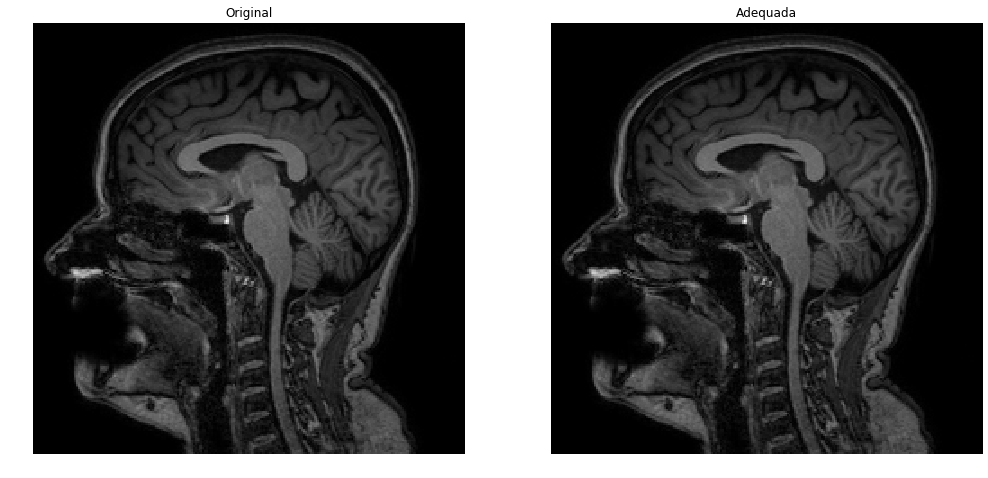

MSE : 3789.52
SSIM: 0.99


In [36]:
# Selecao da Lamina de Imagem e Adequacao (possível redução) da resolução radiométrica.
# # ATENÇÃO: Ao executar esta célula a priemira vez, as imagens não aparecerão, devido a um problema não solucionado 
# com a biblioteca. O problema é resolvido executando a célula pela segunda vez.
%run ../dev/Adequacao.ipynb

O algorítimo MSE aponta para uma diferença significativa entre uma imagem e outra, já que este algorítimo é influenciado pela diferênça observada em cada pixel (ponto) da imagem.<br>

Entretanto, o algorítimo SSIM detectou quase total similaridade entre as imagens, o que pode ser evidenciado apenas com a comparando visualmente as duas.<br>

O formato JPEG permite que se escolha um percentual de qualidade a ser preservado. O teste foi realizado com a preservação de 80% da qualidade da imagem e desta maneira observa-se que a perda de qualidade é mínima, sendo quase imperceptível visualmente sem que a imagem seja ampliada. Abaixo, a imagem original é comparada com a imagem já no formato JPEG. Foi adicionado um retângulo vermelho no intuito de destacar uma parte da imagem, a qual será ampliada para uma análise visual mais detalhada. <br>

Os recortes feitos nas imagens e cujos quais serão ampliados para análise iniciam-se em um ponto identificado como estando na coluna  de pixels localizada proporcionalmente em 53% da largura total da imagem e estando também na linha de pixels localizada em 28% da altura total da imagem, extendendo-se então a um ponto identificado como estando na coluna de pixels que incrementa 20% a coluna inicial, e também estando na linha de pixels que incrementa 20% da linha inicial.<br>

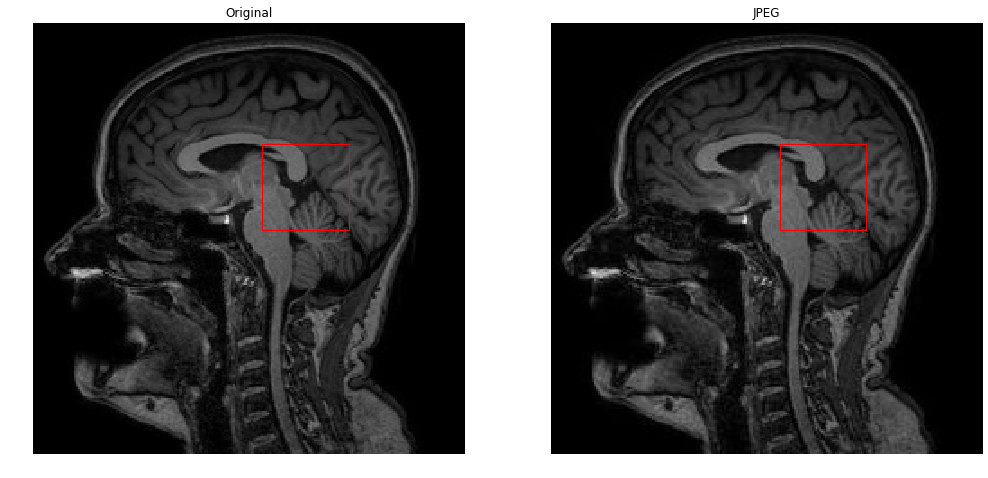

MSE : 3817.22
SSIM: 0.99


In [37]:
teste_jpeg=[80,53,28,20,20]
pickle.dump(teste_jpeg, open('../var/teste_jpeg.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
%run ../dev/teste_jpeg.ipynb 

Após a compressão da imagem pelo algorítimo JPEG, observa-se que a modificação visual da mesma é praticamente imperceptível, comparando com a imagem original no tamanho original, ou seja, sem ampliações.<br>

O índice de similaridade (SSIM) representa isso de maneira clara, sendo que quando aplicado a imagem JPEG praticamente não se observa alterações em relação a comparação anterior feita da imagem original em comparada a aquela com a resolução radiométrica adequada.

Observa-se também que o algorítimo MSE aplicado a imagem JPEG demonstra um distanciamento pouco maior em relação a imagem original, quando comparado com o MSE obtido em relação a imagem anterior.

Entretanto, quando se aplica uma ampliação em um determinado ponto da imagem, então percebe-se que começam a aparecer diferenças visíveis entre as imagens. Abaixo é possível perceber tais diferenças comparando visualmente as imagens recordtadas da imagem original e da imagem comprimida JPEG.

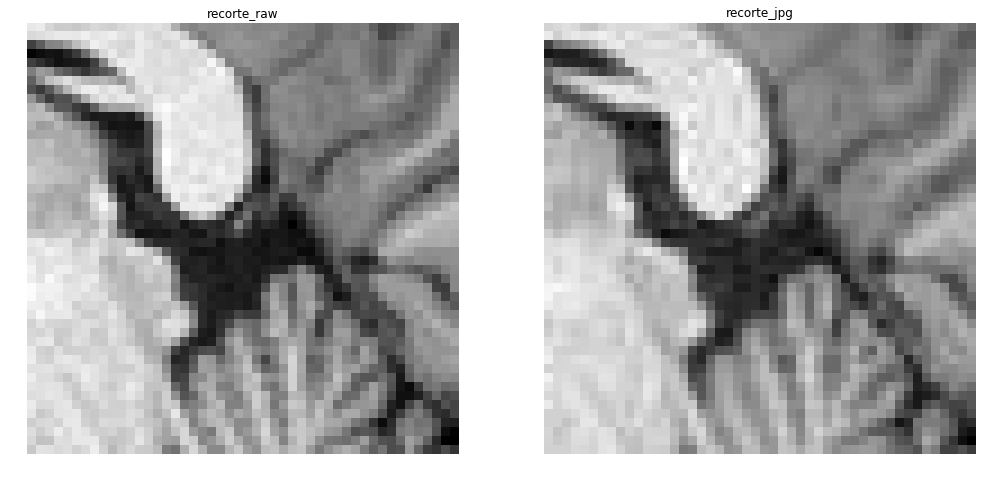

MSE : 11339.85
SSIM: 0.98


In [38]:
pickle.dump(['recorte_raw','recorte_jpg'], open('../var/comparar_imagens.pkl', 'wb'), protocol=pickle.HIGHEST_PROTOCOL)
%run ../dev/comparar_imagens.ipynb 

Observa-se que o algorítimo SSIM, tendo a imagem ampliada, começa a indicar a redução visível na similaridade entre as imagens analisadas, embora a redução não seja grande para este algorítimo.<br>

Entretanto, observa-se que o algorítimo MSE deu um salto em relação a comparação anterior, refletindo uma grande modificação nas imagens quando se considera as cores de cada pixel.<br>


Para avaliar como evolui o índice de similaridade (SIMM) da imagem referente ao recorte em questão na medida em que variamos a qualidade da imagem no formato comprimido, podemos observar o histograma abaixo:

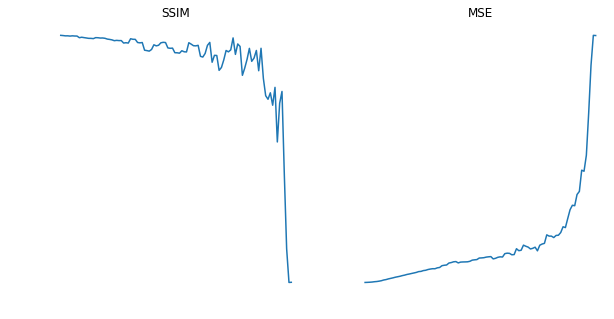

In [39]:
%run ../dev/teste_qualidade_jpeg.ipynb

Reduzindo a qualidade do arquivo JPEG, partindo de 100% de qualidade decrescendo até a qualidade de 1%, é possível observar no histograma acima, o comportamento dos algorítimos SSIM e MSE. Percebe-se que o algorítimo MSE começa a refletir as reduções na qualidade da imagem continuamente desde o princípio, enquanto o algorítimo SIMM, mais eficaz para refeletir resultados sensíveis à visão humana, demora mais para traduzir em números as reduções de qualidade da imagem.

Este experimento está disponível para reprodutibilidade e pode ser acessado no repositório do Git Hub através do endereço:<br>
https://github.com/AdrianodaSilva2017/IA369Z <br>

# Conclusão

À partir das análises feitas neste experimento, conclui-se que é possível transformar imagens digitais médicas em arquivos de imagem do tipo JPEG sem que as perdas de informações contidas na imagem original, decorrentes do processo de compressão, possam significar uma perda de qualidade da imagem capaz de influenciar negativamente uma análise visual. <br>

É impressindível ressaltar, no entanto, que as alterações feitas pela compressão de dados, modificam substancialmente a imagem para análises realizadas por alguns scripts matemáticos, como é o caso do MSE.<br>

Também verifica-se a necessidade de algumas precauções nesse tipo de tarefa, como procurar não reduzir a qualidade do arquivo JPEG para abaixo dos 85%, para que não haja também alterações ainda mais profundas na fidelidade da imagem de tal maneira que seriam sentidas visualmente, e que teriam o potencial de favorecer a ocorrência de equívocos em diagósticos médicos. <br>